In [1]:
#### Dataset Link - https://drive.google.com/file/d/1mR3Ihj-gomoKb-IzpmDYnFT1mlvJHgpZ/view

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
x = data[['YearsExperience']]   ## feature
y = data['Salary']   ## target

In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [8]:
### Split the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=9014)

In [9]:
#### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
### Fit the model (Train the model)
model.fit(xtrain,ytrain)

LinearRegression()

In [11]:
### Testing (Prediction)
ypred = model.predict(xtest)
ypred

array([ 56182.55053157, 100294.69682063,  44919.8748833 ,  62752.44465973,
       122820.04811718, 115311.59768499])

In [12]:
ytest.values

array([ 54445., 101302.,  43525.,  63218., 122391., 116969.])

In [13]:
### Calculate R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.99842716176972

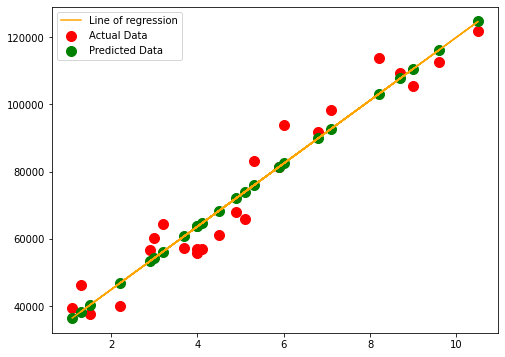

In [14]:
### Plot Line of Regression for Training Samples
plt.figure(figsize=(8,6))
plt.scatter(xtrain,ytrain,color='red',s=100,label="Actual Data")
plt.scatter(xtrain,model.predict(xtrain),color='green',s=100,label="Predicted Data")
plt.plot(xtrain,model.predict(xtrain),color='orange',label="Line of regression")
plt.legend()
plt.show()

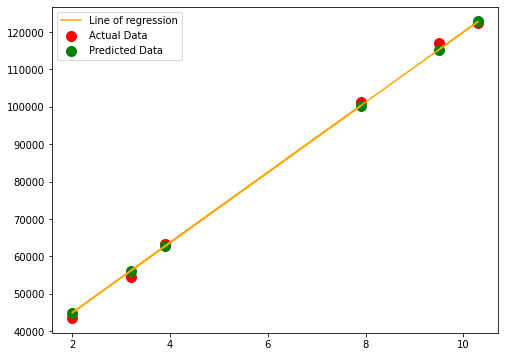

In [15]:
### Plot Line of Regression for Testing Samples
plt.figure(figsize=(8,6))
plt.scatter(xtest,ytest,color='red',s=100,label="Actual Data")
plt.scatter(xtest,model.predict(xtest),color='green',s=100,label="Predicted Data")
plt.plot(xtest,model.predict(xtest),color='orange',label="Line of regression")
plt.legend()
plt.show()

In [16]:
m = model.coef_
c = model.intercept_
print(m,c)

[9385.56304023] 26148.74880284306


In [17]:
accuracy = []
for i in range(10000):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain1,ytrain1)
  ypred1 = model1.predict(xtest1)
  r2_1 = r2_score(ytest1,ypred1)
  accuracy.append(r2_1)

In [18]:
accuracy

[0.988169515729126,
 0.7616681465472094,
 0.8886956733784563,
 0.9695039421049821,
 0.9504404484884267,
 0.9439628569611376,
 0.9368146227107087,
 0.8143022783109006,
 0.9631182154839476,
 0.9388416537799072,
 0.9816423482070253,
 0.940882728477622,
 0.9429269163491423,
 0.9394460269118793,
 0.9606215790278543,
 0.8697012433817218,
 0.7949890249259297,
 0.9384744808306155,
 0.8864330645841889,
 0.9415531751862448,
 0.9441299149555877,
 0.9398582853702572,
 0.8870702615446784,
 0.9184170849214232,
 0.9520702017424296,
 0.9531732818427658,
 0.9835849730044816,
 0.9636425773684423,
 0.9217841352107623,
 0.9467172742609803,
 0.9944092048209745,
 0.8967649524853983,
 0.8985995727228404,
 0.9350785573211586,
 0.9244141448042442,
 0.8839476512584652,
 0.955021106900739,
 0.9778242092591888,
 0.972479448737762,
 0.9928344802911048,
 0.7775083459037234,
 0.9802519469633169,
 0.9024461774180497,
 0.8688045158887867,
 0.934951117043928,
 0.9250487875802145,
 0.9789129767378081,
 0.98399193890564,

In [19]:
np.max(accuracy)

0.99842716176972

In [20]:
np.argmax(accuracy)

9014

In [21]:
#### save the model
import joblib
joblib.dump(model,'salary.pkl')

['salary.pkl']

In [22]:
### Load the model
mymodel = joblib.load("/content/salary.pkl")

In [23]:
### Test New Data
mymodel.predict([[11]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([129389.94224533])

In [24]:
mymodel.predict([[11]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


129389.94224533433

In [25]:
mymodel.predict([[11],[13],[18]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([129389.94224533, 148161.06832579, 195088.88352692])